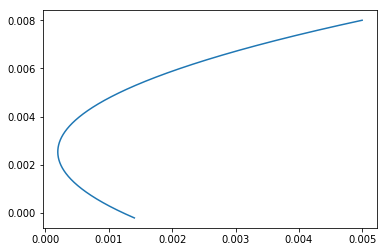

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
stock = pd.read_table('part 3/019/stock.txt',sep='\t',index_col='Trddt')
fjgs=stock.loc[stock.Stkcd==600033,'Dretwd']
fjgs.name = 'fjgs'
zndl=stock.loc[stock.Stkcd==600023,'Dretwd']
zndl.name = 'zndl'
sykj=stock.loc[stock.Stkcd==600183,'Dretwd']
sykj.name = 'sykj'
hxyh=stock.loc[stock.Stkcd==600015,'Dretwd']
hxyh.name = 'hxyh'
byjc=stock.loc[stock.Stkcd==600004,'Dretwd']
byjc.name = 'byjc'
sh_return = pd.concat([byjc,fjgs,hxyh,sykj,zndl],axis=1)
sh_return = sh_return.dropna()


from scipy import linalg
import pandas as pd
import ffn
import matplotlib.pyplot as plt
import numpy as np
#import ffn
class MeanVariance:
    def __init__(self,returns):
        self.returns = returns
    def minVar(self,goalRet):
        covs = np.array(self.returns.cov())#协方差矩阵
        means = np.array(self.returns.mean())#收益率均值
        L1 = np.append(np.append(covs.swapaxes(0,1),[means],0),
                      [np.ones(len(means))],0).swapaxes(0,1)
        L2 = list(np.ones(len(means)))
        L2.extend([0,0])
        L3 = list(means)
        L3.extend([0,0])
        L4 = np.array([L2,L3])
        L = np.append(L1,L4,0)
        results = linalg.solve(L,np.append(np.zeros(len(means)),[1,goalRet],0))
        return(np.array([list(self.returns.columns),results[:-2]]))
    def frontierCurve(self):
        goals = [x/500000 for x in range(-100,4000)] #目标收益
        variances = list(map(lambda x: self.calVar(self.minVar(x)[1,:].astype(np.float)),goals))
        plt.plot(variances,goals)
    def meanRet(self,fracs):
        meanRisky = ffn.to_returns(self.returns).mean()
        assert len(meanrISKY)== len(fracs), '比例的长度等于资产的数量'
        return (np.sum(np.multiply(meanRisky,np.array(fracs))))
    def calVar(self,fracs):
        return(np.dot(np.dot(fracs,self.returns.cov()),fracs))

minVar=MeanVariance(sh_return)
minVar.frontierCurve()

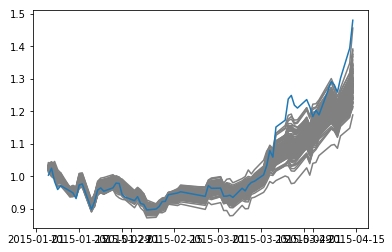

In [4]:
#拆分测试集和训练集
sh_return.index = pd.to_datetime(sh_return.index)
train_set = sh_return['2014']
test_set = sh_return['2015']
#设定目标收益率
varMinimizer = MeanVariance(train_set)
goal_return = 0.003
#得到的投资组合应用于测试集
portfolio_weight = varMinimizer.minVar(goal_return)
test_return=np.dot(test_set,np.array([portfolio_weight[1,:].astype(np.float)]).swapaxes(0,1))
test_return = pd.DataFrame(test_return, index=test_set.index)
test_cum_return = (1+test_return).cumprod()
#随机生成100个组合
sim_weight = np.random.uniform(0,1,(100,5))
sim_weight = np.apply_along_axis(lambda x:x/sum(x),1,sim_weight)
#将组合应用于股票上
sim_return = np.dot(test_set,sim_weight.swapaxes(0,1))
sim_return = pd.DataFrame(sim_return,index=test_cum_return.index)
sim_cum_return = (1+sim_return).cumprod()
plt.plot(sim_cum_return.index,sim_cum_return,color='grey')
plt.plot(test_cum_return.index,test_cum_return)